# Branching processes

We'll

1. simulate from a branching process
2. check that our equation for the probabilty of extinction is correct.

## A branching process

Let's start with the branching process
with offspring distribution given by
$$
    \xi \sim \text{Poisson}(\lambda) .
$$

In [1]:
import numpy as np
rng = np.random.default_rng()

def generation(N, lam):
    # takes in the current generation size, N,
    # and returns the next generation size
    # return sum(rng.poisson(lam=lam, size=N))
    # faster, with Poisson additivity:
    return rng.poisson(lam=N * lam, size=1)

# more generally, we could change the offspring distribution by passing in a function:
def generation2(N, f):
    # takes in the current generation size, N,
    # and returns the next generation size
    return sum(f(N))

def f(N):
    return rng.poisson(lam=3, size=N)

# these are equivalent
generation(10, lam=3), generation2(10, f=f)

(array([27]), 35)

In [2]:
def run_bp(N0, T, lam, Nmax=1e6):
    '''
    Run a branching process started from N0 individuals
    for T generations, returning the T+1-length vector
    of population sizes.
    '''
    out = np.repeat(-1, T+1)
    out[0] = N0
    for t in range(T):
        out[t+1] = generation(out[t], lam)
        if out[t+1] > Nmax:
            break
    return out
        
run_bp(1, 10, 3)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'lam=1.08')

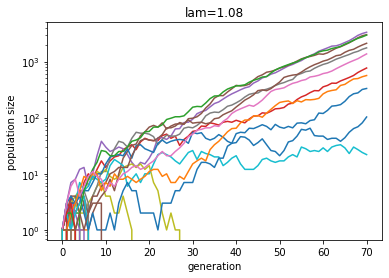

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

lam=1.08
for _ in range(50):
    N = run_bp(1, 70, lam=lam)
    ax.plot(N)
ax.set_yscale('log')
ax.set_xlabel('generation')
ax.set_ylabel('population size')
ax.set_title(f"lam={lam}")

## Probability of extinction

Recall that the probability of extinction is the minimal solution
to
$$ \phi(p) = p $$
where $\phi(u)$ is the generating function of the offspring distribution.
In the case of a Poisson($\lambda$),
$$
    \phi(u) = \exp(\lambda(u-1)) .
$$

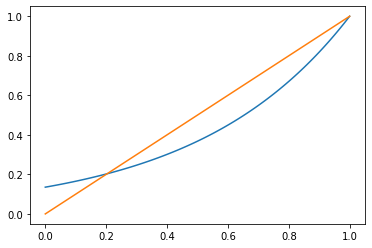

In [4]:
def gen_fn(u, lam):
    return np.exp(lam * (u-1))

fig, ax = plt.subplots()
uvals = np.linspace(0, 1, 101)
ax.plot(uvals, gen_fn(uvals, lam=2))
ax.plot([0, 1], [0, 1]);

In [5]:
def prob_extinction(lam):
    """
    Find the value of u such that 
       gen_fn(u, lam=lam) == u
    """
    u = 0
    for n in range(1, 20):
        if gen_fn(u, lam=lam) > u:
            u += 0.5 ** n
        else:
            u -= 0.5 ** n
    return u

for lam in [0.7, 1.2, 2, 5]:
    p = prob_extinction(lam)
    assert np.isclose(p, gen_fn(p, lam=lam), rtol=1e-3)

## Compare to simulations

In [6]:
def empirical_prob_extinction(lam, nreps=100):
    num_extinct = 0
    for _ in range(nreps):
        N = run_bp(1, T=100, lam=lam)
        if N[-1] == 0:
            num_extinct +=1
    return num_extinct / nreps

empirical_prob_extinction(1.05)

0.86

In [7]:
lamvals = np.linspace(0.5, 3, 11)
pe = [empirical_prob_extinction(lam) for lam in lamvals]


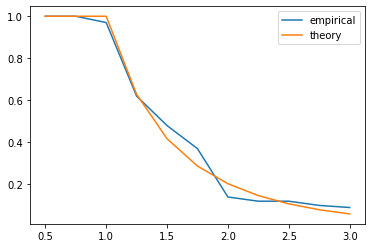

In [8]:
theory_pe = [prob_extinction(lam) for lam in lamvals]

fig, ax = plt.subplots()
ax.plot(lamvals, pe, label='empirical')
ax.plot(lamvals, theory_pe, label='theory')
ax.legend();

It works!!!